## PRMD9 Binding Sites

In [1]:
import pandas as pd
from pybedtools import BedTool
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import re

In [2]:
def filter_hdna(df):
    df["sequence_length"] = df["sequence"].apply(len)
    df["pyrine"] = df["sequence"].str.count("g|a").div(df["sequence_length"])
    df["pyrimidine"] = df["sequence"].str.count("c|t").div(df["sequence_length"])
    df["at_content"] = df["sequence"].str.count("a|t").div(df["sequence_length"])
    df = df[((df["pyrimidine"] >= 0.9) | (df["pyrine"] >= 0.9)) & (df["at_content"] < 0.8)].reset_index(drop=True)
    return df

mirror_df = pd.read_table("../transfer_mirror/mirrors/chm13v2.0_MR.processed.tsv.gz")
hdna_df = filter_hdna(mirror_df)
print(mirror_df.shape, hdna_df.shape)
hdna_bed = BedTool.from_dataframe(hdna_df[["seqID", "start", "end", "sequence"]]).sort()
hdna_df

(1256992, 18) (235970, 18)


,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,composition,sequence_length,pyrine,pyrimidine,at_content
0,chr1,50042,50071,ggagggaggga,ggcagaa,ggagggagggaggcagaaagggagggagg,11,7,29,3,8,0,0,3A/0C/8G/0T,29,0.965517,0.034483,0.310345
1,chr1,50059,50086,aagggaggga,ggcagaa,aagggagggaggcagaaagggagggaa,10,7,27,4,6,0,0,4A/0C/6G/0T,27,0.962963,0.037037,0.407407
2,chr1,50082,50111,ggaaggaagga,gcaagga,ggaaggaaggagcaaggaaggaaggaagg,11,7,29,5,6,0,0,5A/0C/6G/0T,29,0.965517,0.034483,0.448276
3,chr1,50095,50117,aaggaaggaag,.,aaggaaggaaggaaggaaggaa,11,0,22,6,5,0,0,6A/0C/5G/0T,22,1.000000,0.000000,0.545455
4,chr1,50097,50119,ggaaggaagga,.,ggaaggaaggaaggaaggaagg,11,0,22,5,6,0,0,5A/0C/6G/0T,22,1.000000,0.000000,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235965,chrY,62192837,62192864,ctctctctctctc,t,ctctctctctctctctctctctctctc,13,1,27,0,0,7,6,0A/7C/0G/6T,27,0.000000,1.000000,0.481481
235966,chrY,62247108,62247130,aaagaaggaag,.,aaagaaggaaggaaggaagaaa,11,0,22,7,4,0,0,7A/0C/4G/0T,22,1.000000,0.000000,0.636364
235967,chrY,62247260,62247284,gggagggagg,ggat,gggagggaggggatggagggaggg,10,4,24,2,8,0,0,2A/0C/8G/0T,24,0.958333,0.041667,0.250000
235968,chrY,62255805,62255833,aggaggaggaggag,.,aggaggaggaggaggaggaggaggagga,14,0,28,5,9,0,0,5A/0C/9G/0T,28,1.000000,0.000000,0.357143


In [3]:
hotspots = Path("DSBhotspots_hs1").glob("*.hs1.bed")
peaks = {re.search("(\w+\d+)\.", peak.name).group(1): peak for peak in hotspots}
peaks

{'AA1': PosixPath('DSBhotspots_hs1/AA1.peaks.hs1.bed'),
 'AA2': PosixPath('DSBhotspots_hs1/AA2.peaks.hs1.bed'),
 'AA3': PosixPath('DSBhotspots_hs1/AA3.peaks.hs1.bed'),
 'AA4': PosixPath('DSBhotspots_hs1/AA4.peaks.hs1.bed'),
 'hs1': PosixPath('DSBhotspots_hs1/AN.peaks.hs1.bed'),
 'AB1': PosixPath('DSBhotspots_hs1/AB1.peaks.hs1.bed'),
 'CL4': PosixPath('DSBhotspots_hs1/CL4.peaks.hs1.bed')}

In [4]:
hotspots = Path("DSBhotspots_hs1").glob("*.hs1.bed")
peaks = {re.search("([\w\d]+)\.", peak.name).group(1): peak for peak in hotspots}
peaks

{'AA1': PosixPath('DSBhotspots_hs1/AA1.peaks.hs1.bed'),
 'AA2': PosixPath('DSBhotspots_hs1/AA2.peaks.hs1.bed'),
 'AA3': PosixPath('DSBhotspots_hs1/AA3.peaks.hs1.bed'),
 'AA4': PosixPath('DSBhotspots_hs1/AA4.peaks.hs1.bed'),
 'AA4a': PosixPath('DSBhotspots_hs1/AA4a.peaks.hs1.bed'),
 'AA4b': PosixPath('DSBhotspots_hs1/AA4b.peaks.hs1.bed'),
 'AB1': PosixPath('DSBhotspots_hs1/AB1.peaks.hs1.bed'),
 'AC': PosixPath('DSBhotspots_hs1/AC.peaks.hs1.bed'),
 'AN': PosixPath('DSBhotspots_hs1/AN.peaks.hs1.bed'),
 'CL4': PosixPath('DSBhotspots_hs1/CL4.peaks.hs1.bed')}

In [5]:
import numpy as np

In [6]:
window_size = 3_000
from mindi.coverage.windows_maker import WindowMaker

maker = WindowMaker(base=0, window_size=window_size)
maker

WindowMaker(window_size=3000, base=0)

## Total Number of H-DNA within 500bp Window

In [7]:
from collections import defaultdict
from tqdm import tqdm

at_least_one = defaultdict(list)
COVERAGE_FIELDS = ["totalHits", "overlappingBp", "compartmentLength", "coverage"]

# MERGE H-DNA
hdna_bed_merged = hdna_bed.sort().merge()

for allele in tqdm(peaks):
    peak = BedTool(peaks[allele]).sort()# .slop(l=100, 
                                        #      r=100, 
                                        #      g="../datasets/genome.txt")
    cov_df = pd.read_table(peak.coverage(hdna_bed_merged).fn,
                           header=None, 
                           names=['seqID', 'start', 'end'] + COVERAGE_FIELDS)
    cov_df['at_least'] = (cov_df['totalHits'] > 0).astype(int)
    cov_df = cov_df.at_least.value_counts()
    at_least_one["allele"].append(allele)
    at_least_one["1"].append(cov_df.loc[1])
    at_least_one["0"].append(cov_df.loc[0])

at_least_one = pd.DataFrame(at_least_one)
at_least_one['H-DNA Presence'] = 1e2 * at_least_one["1"] / (at_least_one["1"] + at_least_one["0"])
# at_least_one["H-DNA Absence"] = 100 - at_least_one["H-DNA Presence"]
# at_least_one = at_least_one.melt(id_vars=["allele"], value_vars=["H-DNA Presence", "H-DNA Absence"])
at_least_one

100%|██████████| 10/10 [00:02<00:00,  4.65it/s]


,allele,1,0,H-DNA Presence
0,AA1,1893,30295,5.881074
1,AA2,2032,36358,5.293045
2,AA3,893,16810,5.044343
3,AA4,1132,21941,4.906167
4,AA4a,615,12662,4.632070
5,AA4b,959,19090,4.783281
6,AB1,1494,25390,5.557209
7,AC,2220,45401,4.661809
8,AN,1488,25326,5.549340
9,CL4,510,15222,3.241800


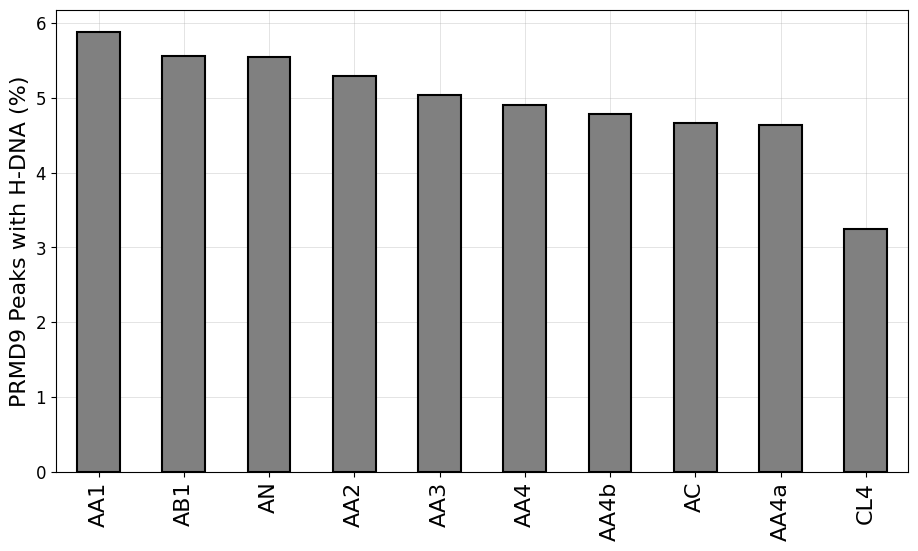

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 6))

at_least_one.set_index("allele").drop(columns=["0", "1"]).sort_values(by=['H-DNA Presence'], ascending=False).plot(kind="bar", 
                stacked=True, 
                ax=ax,     
                edgecolor='black',                                                                                   
                color='gray',
                linewidth=1.5
            )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.legend(handles=[], frameon=False)
# ax.legend(title='', bbox_to_anchor=(1.01, 0.9), prop={"size": 14})
ax.tick_params(axis="both", labelsize=12)
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('')
ax.yaxis.label.set_size(16)
ax.set_ylabel('PRMD9 Peaks with H-DNA (%)')
ax.set_axisbelow(True)
figures = Path("figures")
figures.mkdir(exist_ok=True)
fig.savefig(f"{figures}/PRMD9_peaks_with_at_least_one.png", bbox_inches='tight')

In [11]:
from collections import defaultdict
from tqdm import tqdm

COVERAGE_FIELDS = ["totalHits", "overlappingBp", "compartmentLength", "coverage"]

# MERGE H-DNA
hdna_bed_merged = hdna_bed.sort().merge()

coverage_df = []
for allele in tqdm(peaks):
    peak = BedTool(peaks[allele]).sort() #.slop(l=100, 
                                         #     r=100, 
                                         #     g="../datasets/genome.txt")
    cov_df = pd.read_table(peak.coverage(hdna_bed_merged).fn,
                           header=None, 
                           names=['seqID', 'start', 'end'] + COVERAGE_FIELDS
                          ).assign(coverage=lambda ds: 1e2 * ds['coverage'])
    cov_df['allele'] = allele
    coverage_df.append(cov_df)

coverage_df = pd.concat(coverage_df)
coverage_df

100%|██████████| 10/10 [00:02<00:00,  4.69it/s]


,seqID,start,end,totalHits,overlappingBp,compartmentLength,coverage,allele
0,chr1,298662,299792,0,0,1130,0.000,AA1
1,chr1,308475,309395,0,0,920,0.000,AA1
2,chr1,337110,338759,1,28,1649,1.698,AA1
3,chr1,357435,358567,0,0,1132,0.000,AA1
4,chr1,362547,363619,0,0,1072,0.000,AA1
...,...,...,...,...,...,...,...,...
15727,chrY,22333026,22333942,0,0,916,0.000,CL4
15728,chrY,22467790,22469182,0,0,1392,0.000,CL4
15729,chrY,22469680,22470821,0,0,1141,0.000,CL4
15730,chrY,22673682,22674538,0,0,856,0.000,CL4


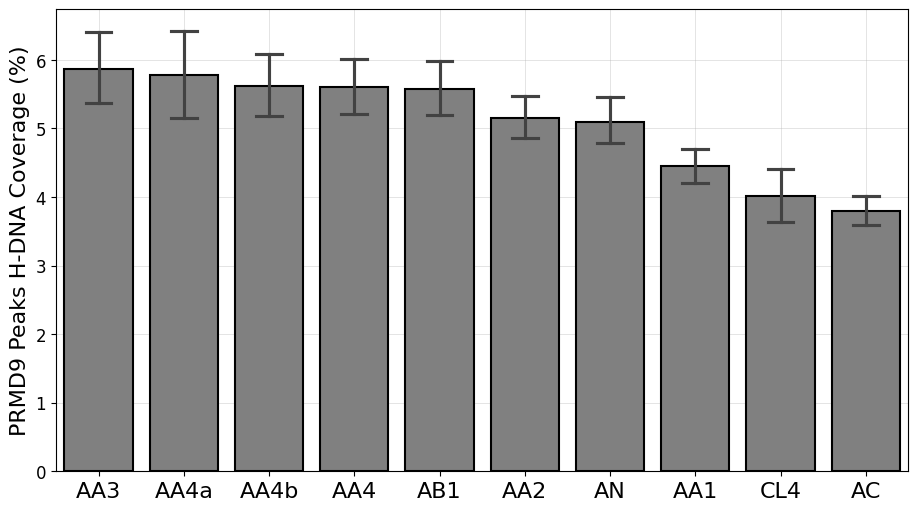

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 6))

temp = coverage_df.query("coverage > 0")
sns.barplot(data=temp,
            x="allele", 
            y="coverage",
            color="gray",
            linewidth=1.5,
            edgecolor='black',
            capsize=.3,
            order=temp.groupby("allele").agg({"coverage": "mean"}).sort_values(by=['coverage'], ascending=False).index.tolist()
           )

ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.legend(handles=[], frameon=False)
# ax.legend(title='', bbox_to_anchor=(1.01, 0.9), prop={"size": 14})
ax.tick_params(axis="both", labelsize=12)
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('')
ax.yaxis.label.set_size(16)
ax.set_ylabel('PRMD9 Peaks H-DNA Coverage (%)')
ax.set_axisbelow(True)
fig.savefig(f"{figures}/PRMD9_peaks_with_at_least_one_coverage.png", bbox_inches='tight')

## PRMD9 Peak Sites

In [13]:
GFF_PATH = Path("/storage/group/izg5139/default/nicole/datasets/GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz")
genome = pd.read_table("/storage/group/izg5139/default/nicole/datasets/sequence_report.tsv", index_col="RefSeq seq accession")['UCSC style name'].to_dict()
genome

{'NC_060925.1': 'chr1',
 'NC_060926.1': 'chr2',
 'NC_060927.1': 'chr3',
 'NC_060928.1': 'chr4',
 'NC_060929.1': 'chr5',
 'NC_060930.1': 'chr6',
 'NC_060931.1': 'chr7',
 'NC_060932.1': 'chr8',
 'NC_060933.1': 'chr9',
 'NC_060934.1': 'chr10',
 'NC_060935.1': 'chr11',
 'NC_060936.1': 'chr12',
 'NC_060937.1': 'chr13',
 'NC_060938.1': 'chr14',
 'NC_060939.1': 'chr15',
 'NC_060940.1': 'chr16',
 'NC_060941.1': 'chr17',
 'NC_060942.1': 'chr18',
 'NC_060943.1': 'chr19',
 'NC_060944.1': 'chr20',
 'NC_060945.1': 'chr21',
 'NC_060946.1': 'chr22',
 'NC_060947.1': 'chrX',
 'NC_060948.1': 'chrY'}

In [14]:
def load_compartments():
    def _merge_overlaps(compartments, col, col_index):
        comp = compartments[col].unique()
        merged_comp = []
        for c in tqdm(comp):
            temp = pd.read_table(
                BedTool.from_dataframe(compartments[compartments[col] == c]).sort().merge(c=col_index, o="distinct").fn,
                header=None,
                names=['seqID', 'start', 'end', 'compartment'])
            merged_comp.append(temp)
        merged_comp = pd.concat(merged_comp)
        return merged_comp
    
    compartments = pd.read_table("../datasets/chm13v2.0_censat_v2.1.bed", skiprows=1, names=["seqID", "start", "end", "compartment"], header=None, usecols=range(4))
    compartments["compartment"] = compartments["compartment"].apply(lambda x: x.split('_')[0])
    compartments = _merge_overlaps(compartments, "compartment", 4)

    # sva & alu
    sva_df = pd.read_table("datasets/chm13v2.0_SVA.bed", header=None, names=["seqID", "start", "end"], usecols=range(3)).assign(compartment="SVA")
    alu_df = pd.read_table("datasets/chm13v2.0_Alu.bed", header=None, names=["seqID", "start", "end"], usecols=range(3)).assign(compartment="Alu")

    # gff
    gff_df = pd.read_table(GFF_PATH, 
                           comment="#", 
                           header=None,
                           names=["seqID", "source", "compartment", "start", "end"], 
                           usecols=range(5)
                           )
    gff_df['seqID'] = gff_df['seqID'].map(genome)
    gff_df = gff_df[["seqID", "start", "end", "compartment"]]
    gff_df = gff_df.query("compartment == 'gene' | compartment == 'exon' | compartment == 'CDS' | compartment == 'enhancer' | compartment == 'silencer'").copy()
    gff_df = _merge_overlaps(gff_df, "compartment", 4)
    return pd.concat([sva_df, alu_df, compartments, gff_df], axis=0)

compartments_df = load_compartments()
compartments_bed = BedTool.from_dataframe(compartments_df).sort()
compartments_df.head(10)

100%|██████████| 5/5 [00:14<00:00,  2.85s/it]


,seqID,start,end,compartment
0,chr1,33201157,33201208,SVA
1,chr1,203452249,203452293,SVA
2,chr15,15074264,15074335,SVA
3,chr4,3226413,3226603,SVA
4,chr1,157687,157800,SVA
5,chr1,164502,164615,SVA
6,chr1,266063,266144,SVA
7,chr1,816150,816180,SVA
8,chr1,816489,816645,SVA
9,chr1,3448481,3448497,SVA


In [15]:
window_size = 3_000
maker = WindowMaker(base=0, window_size=window_size)

peaks_df = pd.concat([
                    pd.read_table(peak, 
                                    header=None,
                        names=["seqID", "start", "end"]).assign(allele=allele) for allele, peak in peaks.items()],
                     axis=0)\
            .sort_values(by=["seqID", "start"], ascending=True)\
          .reset_index(drop=True)
# peaks_df["start"] = np.maximum(peaks_df["start"] - window_size, 0)
# peaks_df["end"] = peaks_df["end"] + window_size + 1

peaks_df_win = maker.make_windows(peaks_df, loci="mid")
peaks_bed = BedTool.from_dataframe(peaks_df_win).sort()
peaks_df_win

,seqID,start,end,allele
0,chr1,283559,289560,AC
1,chr1,286970,292971,AC
2,chr1,296067,302068,AA2
3,chr1,296023,302024,AA3
4,chr1,296070,302071,AC
...,...,...,...,...
261726,chrY,27294490,27300491,AA4b
261727,chrY,27294499,27300500,AA4
261728,chrY,27294538,27300539,AA4a
261729,chrY,27381001,27387002,AC


### Fischer Test

In [16]:
from scipy.stats import fisher_exact, chi2_contingency

def calculate_fisher_test(global_df, A_df, H_DNA):
    # H-DNA --> rDNA without prmd9 and rDNA with prmd9
    # > rDNA without prmd9
    # Let A = rDNA without prmd9 and 
    # let B = rDNA with prmd9
    #
    # Calculate prmd9 motif in r-DNA that overlaps with H-DNA
    A_df = A_df.rename(columns={"chromosome": "seqID"})
    if "length" not in A_df:
        A_df["length"] = A_df["end"] - A_df["start"]
    total_records = A_df.shape[0]
    A_bed =  BedTool.from_dataframe(A_df[["seqID", "start", "end"]]).sort() #.merge()
    H_DNA = pd.read_table(BedTool.from_dataframe(H_DNA).sort().merge().intersect(A_bed).fn, 
                          header=None, 
                          names=["seqID", "start", "end"])
    H_DNA["length"] = H_DNA["end"] - H_DNA["start"]
    total_HDNA = H_DNA["length"].sum()
    
    HDNA_bed =  BedTool.from_dataframe(H_DNA).sort()
    global_bed = BedTool.from_dataframe(global_df).sort()

    ### Calculate A that overlaps with HDNA
    A_df_with_HDNA = pd.read_table(
                    BedTool.from_dataframe(A_df[["seqID", "start", "end"]])\
                                .sort()\
                                .intersect(HDNA_bed).fn,
                    header=None, 
                    names=["seqID", "start", "end"]
                ).assign(length=lambda ds: ds['end']-ds['start'])
    
    A_with_HDNA = A_df_with_HDNA['length'].sum()
    
    # Calculate B that overlaps with H-DNA
    # We don't know B yet
    # get B by removing A from global
    B_bed = global_bed.subtract(A_bed)
    
    # Now find B that overlaps with H-DNA as we did with A
    B_df_with_HDNA = pd.read_table(
                                B_bed.intersect(HDNA_bed).fn,
                    header=None, 
                    names=["seqID", "start", "end"]
                ).assign(length=lambda ds: ds['end']-ds['start'])
    B_with_HDNA = B_df_with_HDNA['length'].sum()

    # calculate total parent
    global_df["length"] = global_df["end"] - global_df["start"]
    global_bp = global_df["length"].sum()
    

    # Now calculate A without H-DNA
    # Finally, calculate B without H-DNA
    # calculate total prmd9 motif bp in rDNA
    # calcualte total A
    total_A_bp = A_df["length"].sum()
    
    # calculate total B
    total_B_bp = global_bp - total_A_bp
    
    # calculate total rDNA without prmd9 and without H-DNA
    A_without_HDNA = total_A_bp - A_with_HDNA
    B_without_HDNA = total_B_bp - B_with_HDNA

    assert A_with_HDNA + A_without_HDNA == total_A_bp
    assert B_with_HDNA + B_without_HDNA == total_B_bp
    assert A_with_HDNA + A_without_HDNA + B_with_HDNA + B_without_HDNA == total_A_bp + total_B_bp == global_bp
    assert A_with_HDNA + B_with_HDNA == total_HDNA, f"{A_with_HDNA},{B_with_HDNA},{total_HDNA}"
    assert A_without_HDNA + B_without_HDNA == global_bp - total_HDNA

    table_prmd9 = np.array([
                            [A_with_HDNA, B_with_HDNA],
                            [A_without_HDNA, B_without_HDNA]
    ])
    
    return table_prmd9,  chi2_contingency(table_prmd9), total_records

In [87]:
genome = pd.read_table("/storage/group/izg5139/default/nicole/datasets/genome.txt", header=None, 
                      names=["seqID", "end"]).assign(start=0)[["seqID", "start", "end"]]
genome.head()

,seqID,start,end
0,chr1,0,248387328
1,chr2,0,242696752
2,chr3,0,201105948
3,chr4,0,193574945
4,chr5,0,182045439


In [18]:
alleles = peaks_df['allele'].unique()
alleles

array(['AC', 'AA2', 'AA3', 'AA1', 'AB1', 'AA4', 'AA4b', 'AA4a', 'CL4',
       'AN'], dtype=object)

In [32]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define a third-degree polynomial function
def poly3(x, b, c, d, e, f):
    return b * x ** 4 + c * x ** 3 + d * x ** 2 + e * x + f

In [33]:
total_hdna = hdna_bed.sort().merge()
total_hdna_c = total_hdna.count()
total_hdna_c

123604

In [26]:
coverage_df = pd.read_table(
                    peaks_bed.coverage(hdna_bed.sort().merge()).fn,
                    header=None,
                    names=peaks_df.columns.tolist() + COVERAGE_FIELDS
)
coverage_df

,seqID,start,end,allele,totalHits,overlappingBp,compartmentLength,coverage
0,chr1,283559,289560,AC,0,0,6001,0.0
1,chr1,286970,292971,AC,0,0,6001,0.0
2,chr1,296023,302024,AA3,0,0,6001,0.0
3,chr1,296067,302068,AA2,0,0,6001,0.0
4,chr1,296070,302071,AC,0,0,6001,0.0
...,...,...,...,...,...,...,...,...
261726,chrY,27294538,27300539,AA4a,0,0,6001,0.0
261727,chrY,27294575,27300576,AA1,0,0,6001,0.0
261728,chrY,27294585,27300586,AC,0,0,6001,0.0
261729,chrY,27381001,27387002,AC,0,0,6001,0.0


In [27]:
coverage_df['at_least'] = (coverage_df['coverage'] > 0).astype(int)
coverage_df.groupby("allele")['totalHits'].mean().sort_values(ascending=False)

allele
AA3     0.316331
AA4a    0.316111
AA4b    0.309841
AB1     0.307023
AA4     0.303255
AN      0.297718
AA2     0.289945
AA1     0.286380
AC      0.252935
CL4     0.240656
Name: totalHits, dtype: float64

In [88]:
from mindi.coverage.pwm_density import PWMExtractor
extractor = PWMExtractor()

from tqdm import tqdm
alleles = list(intersect_df['allele'].unique())
seqID = list(intersect_df['seqID'].unique())

allele_densities = {}

for allele in tqdm(alleles):
    intersect_df_query = intersect_df[intersect_df['allele'] == allele]
    density = np.array(
                        extractor.extract_density(
                            intersect_df_query.assign(strand='+'), 
                            window_size=window_size
                        )
            )
    allele_densities[allele] = density

100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


In [80]:
def how_far_away(d):
    if d < 250:
        return '< 250'
    if d < 500:
        return '< 500'
    if d < 1000:
        return '< 1000'
    if d < 1500:
        return '< 1500'
    return '> 1500'
    
    
intersect_df['far_away'] = intersect_df['distance'].map(how_far_away)

In [82]:
flow_alleles = {}

for allele in tqdm(alleles):
    intersect_df_query = BedTool.from_dataframe(intersect_df[intersect_df['allele'] == allele][["seqID", "start", "end", "far_away"]]).sort()
    compartment_count = pd.read_table(
                                intersect_df_query.intersect(compartments_bed, 
                                                             f=0.2, 
                                                             wao=True).fn,
                                header=None,
                                names=["seqID", "start", "end", "far_away"] + ["chrom", "comp_start", "comp_end", "compartment", "overlap"]
                        )
    compartment_count["compartment"] = compartment_count["compartment"].replace(".", "Other")
    percentages = []
    cat = ["< 250", "< 500", "< 1000", "< 1500", "> 1500"]

    for d in cat:
        compartment_count_grp = compartment_count.query(f"far_away == '{d}'").copy()\
                                                 .groupby(["seqID", "start", "end"], as_index=False)\
                                                 .agg(
                                                                comp=("compartment", lambda ds: list(ds.unique()))
                                                             )
        total_items = compartment_count_grp.shape[0]
        compartment_count_grp = compartment_count_grp.explode("comp")\
                                            .groupby("comp")\
                                            .agg(counts=("end", "count"))\
                        .assign(perc=lambda ds: 1e2 * ds['counts'].div(total_items))\
                        .rename(columns={"perc": f"perc_{d}"}).drop(columns=['counts'])
        percentages.append(compartment_count_grp)

    merged_grp = None
    for df in percentages:
        if merged_grp is None:
            merged_grp = df 
        else:
            merged_grp = merged_grp.merge(df, left_index=True, right_index=True, how="outer")
    merged_grp = merged_grp.fillna(0.0)
    flow_alleles.update({allele: merged_grp})

100%|██████████| 10/10 [00:14<00:00,  1.50s/it]


In [83]:
## LOAD PEAKS

peaks_df = pd.concat([
    pd.read_table(peak, 
                  header=None,
                  names=["seqID", "start", "end"]
                 ).assign(allele=allele) for allele, peak in peaks.items()],
                axis=0)\
        .sort_values(by=["seqID", "start"], ascending=True).reset_index(drop=True)
peaks_df

,seqID,start,end,allele
0,chr1,285986,287133,AC
1,chr1,289256,290685,AC
2,chr1,298606,299529,AA2
3,chr1,298619,299427,AA3
4,chr1,298622,299518,AC
...,...,...,...,...
261726,chrY,27296811,27298170,AA4b
261727,chrY,27296829,27298170,AA4
261728,chrY,27296963,27298113,AA4a
261729,chrY,27382836,27385167,AC


In [84]:
alleles = peaks_df["allele"].unique()
peaks_merged = []

for allele in tqdm(alleles):
    temp = pd.read_table(
                BedTool.from_dataframe(peaks_df.query(f"allele == '{allele}'")[["seqID", "start", "end", "allele"]])\
                            .sort()\
                            .merge(c="4", o="distinct").fn,
                    header=None,
                    names=["seqID", "start", "end", "allele"]
    )
    peaks_merged.append(temp)
    
peaks_merged = pd.concat(peaks_merged, axis=0)
peaks_merged

100%|██████████| 10/10 [00:01<00:00,  7.79it/s]


,seqID,start,end,allele
0,chr1,285986,287133,AC
1,chr1,289256,290685,AC
2,chr1,298622,299518,AC
3,chr1,307020,307911,AC
4,chr1,317899,319038,AC
...,...,...,...,...
26809,chrY,22657313,22658431,AN
26810,chrY,22666452,22667292,AN
26811,chrY,22678508,22679880,AN
26812,chrY,27260720,27262405,AN


In [85]:
peaks_df.shape, peaks_merged.shape

((261731, 4), (261728, 4))

## Densities

In [ ]:
window_size = 3000
alleles = peaks_df['allele'].unique()

maker = WindowMaker(base=0, window_size=window_size)
# peaks_df["start"] = np.maximum(peaks_df["start"] - window_size, 0)
# peaks_df["end"] = peaks_df["end"] + window_size + 1

# EXPAND 3000bp WINDOW FROM THE MID OF THE PEAK
peaks_df_win = maker.make_windows(peaks_df, loci="mid")

In [ ]:
peaks_bed = BedTool.from_dataframe(peaks_df_win).sort()
peaks_bed.head()

In [ ]:
total_hdna_c = hdna_bed.sort().merge().count()
total_hdna_c

In [ ]:
intersect_df = pd.read_table(
                    peaks_bed.intersect(hdna_bed.sort(), wo=True).fn,
                    header=None,
                    names=peaks_df.columns.tolist() + ["chrom", "motif_start", "motif_end", "overlap"]
)

intersect_df["mid"] = intersect_df["start"] + window_size # + intersect_df["end"]) // 2
intersect_df["distance"] = np.minimum(abs(intersect_df["motif_start"] - intersect_df["mid"]), 
                                      abs(intersect_df["motif_end"] -1 - intersect_df["mid"])
                                      )

total_overlapping = intersect_df\
                        .drop_duplicates(subset=['allele', 'chrom', 'motif_start', 'motif_end'])\
                        .groupby(["allele"])\
                        .agg(perc=("seqID", lambda ds: 1e2 * ds.count() / total_hdna_c))

perc_grp = {}
for d in [250, 500, 1000, 1500, 2000, 3000, 4000, 5000]:
    overlap = intersect_df.query(f"distance <= {d}")\
                        .drop_duplicates(subset=['allele', 'chrom', 'motif_start', 'motif_end'])\
                        .groupby(["allele"])\
                        .agg(perc=("seqID", lambda ds: 1e2 * ds.count() / total_hdna_c)).rename(columns={"perc": f'perc_<{d}'})
    perc_grp.update({d: overlap})

grp = None
for d, overlap in perc_grp.items():
    if grp is None:
        grp = overlap
    else:
        grp = grp.merge(overlap, 
                        left_index=True, 
                        right_index=True, 
                        how="outer")

print(intersect_df.drop_duplicates(subset=peaks_df.columns.tolist()).allele.value_counts())
intersect_df["bin_dist"] = pd.qcut(intersect_df["distance"], 4, labels=False)
intersect_df

In [ ]:
hdna_bed.head()

In [35]:
from Bio.Seq import Seq

intersect_df = pd.read_table(
                    peaks_bed.intersect(hdna_bed.sort(), wo=True).fn,
                    header=None,
                    names=peaks_df.columns.tolist() + ["chrom", "motif_start", "motif_end", "sequence", "overlap"]
)

def complement(seq):
    ga = seq.count("g") + seq.count("a")
    length = len(seq)
    if ga / length < 0.5:
        seq = str(Seq(seq).reverse_complement())
    return seq

intersect_df['sequence'] = intersect_df['sequence'].apply(complement)

intersect_df["mid"] = intersect_df["start"] + window_size # + intersect_df["end"]) // 2
intersect_df["distance"] = np.minimum(abs(intersect_df["motif_start"] - intersect_df["mid"]), 
                                      abs(intersect_df["motif_end"] -1 - intersect_df["mid"])
                                      )

# total_overlapping = intersect_df\
#                         .drop_duplicates(subset=['allele', 'chrom', 'motif_start', 'motif_end'])\
#                         .groupby(["allele"])\
#                         .agg(perc=("seqID", lambda ds: 1e2 * ds.count() / total_hdna_c))

# perc_grp = {}
# for d in [250, 500, 1000, 1500, 2000, 3000, 4000, 5000]:
#     overlap = intersect_df.query(f"distance <= {d}")\
#                         .drop_duplicates(subset=['allele', 'chrom', 'motif_start', 'motif_end'])\
#                         .groupby(["allele"])\
#                         .agg(perc=("seqID", lambda ds: 1e2 * ds.count() / total_hdna_c)).rename(columns={"perc": f'perc_<{d}'})
#     perc_grp.update({d: overlap})

# grp = None
# for d, overlap in perc_grp.items():
#     if grp is None:
#         grp = overlap
#     else:
#         grp = grp.merge(overlap, 
#                         left_index=True, 
#                         right_index=True, 
#                         how="outer")

# print(intersect_df.drop_duplicates(subset=peaks_df.columns.tolist()).allele.value_counts())
# intersect_df["bin_dist"] = pd.qcut(intersect_df["distance"], 4, labels=False)
# intersect_df
intersect_df

,seqID,start,end,allele,chrom,motif_start,motif_end,sequence,overlap,mid,distance
0,chr1,315304,321305,CL4,chr1,318296,318323,aggaaggaaggaaggaagaaggaagga,27,318304,8
1,chr1,315304,321305,CL4,chr1,318598,318623,agggagggagagagggagggaggga,25,318304,294
2,chr1,315468,321469,AC,chr1,318296,318323,aggaaggaaggaaggaagaaggaagga,27,318468,146
3,chr1,315468,321469,AC,chr1,318598,318623,agggagggagagagggagggaggga,25,318468,130
4,chr1,334599,340600,AC,chr1,338667,338695,aggggagtagggggaggggatgagggga,28,337599,1068
...,...,...,...,...,...,...,...,...,...,...,...
156716,chrY,22342546,22348547,AA3,chrY,22348201,22348228,agggaaggaaagaaacaaaggaaggga,27,22345546,2655
156717,chrY,22342557,22348558,AA4,chrY,22348201,22348228,agggaaggaaagaaacaaaggaaggga,27,22345557,2644
156718,chrY,22342589,22348590,AA1,chrY,22348201,22348228,agggaaggaaagaaacaaaggaaggga,27,22345589,2612
156719,chrY,22342597,22348598,AB1,chrY,22348201,22348228,agggaaggaaagaaacaaaggaaggga,27,22345597,2604


In [36]:
from collections import Counter

for allele in alleles:
    print(allele)
    print(Counter(intersect_df.query(f"distance < 250 & allele == '{allele}'")['sequence']).most_common(5))

AC
[('agagagagagagagagagaga', 24), ('aggaaggaaggaaggaagga', 20), ('gagagagagagagagagagag', 16), ('gaaggaaggaaggaaggaag', 16), ('agagagagagagagagagagaga', 16)]
AA2
[('aggaaggaaggaaggaagga', 31), ('agggagggagggagggaggga', 28), ('agagagagagagagagagaga', 23), ('ggagggagggagggagggagg', 23), ('gaaggaaggaaggaaggaag', 20)]
AA3
[('ggaaggaaggagggaaggaagg', 17), ('aggaaggaaggaaggaagga', 15), ('ggagggagggagggagggagg', 10), ('agagagagagagagagagaga', 9), ('gaaggaaggaaggaaggaag', 9)]
AA1
[('aggaaggaaggaaggaagga', 28), ('agggagggagggagggaggga', 26), ('agagagagagagagagagaga', 21), ('ggagggagggagggagggagg', 21), ('gaaggaaggaaggaaggaag', 19)]
AB1
[('aggaaggaaggaaggaagga', 25), ('agggagggagggagggaggga', 19), ('gaaggaaggaaggaaggaag', 15), ('aaggaaggaaggaaggaaggaa', 14), ('ggagggagggagggagggagg', 13)]
AA4
[('aggaaggaaggaaggaagga', 20), ('ggaaggaaggagggaaggaagg', 17), ('ggagggagggagggagggagg', 14), ('agagagagagagagagagaga', 12), ('gaaggaaggaaggaaggaag', 12)]
AA4b
[('ggaaggaaggagggaaggaagg', 17), ('aggaaggaag

In [37]:
def bootstrap_bins(df, N=1_000, window_size=3000):
    extractor = PWMExtractor()
    densities = []
    for _ in range(N):
        sample = df.sample(frac=1.0, replace=True)
        density = np.array(
                        extractor.extract_density(
                            sample.assign(strand='+'), 
                            window_size=window_size
                        )
            )
        density = density / np.mean(density)
        densities.append(density)

    densities = pd.DataFrame(densities)
    avg = densities.mean()
    ci_975 = densities.quantile(0.975)
    ci_025 = densities.quantile(0.025)
    return avg, ci_025, ci_975

In [38]:
from mindi.coverage.pwm_density import PWMExtractor
extractor = PWMExtractor()

alleles = list(intersect_df['allele'].unique())
seqID = list(intersect_df['seqID'].unique())

allele_densities = {}

for allele in alleles:
    intersect_df_query = intersect_df[intersect_df['allele'] == allele]
    density = np.array(
                        extractor.extract_density(
                            intersect_df_query.assign(strand='+'), 
                            window_size=window_size
                        )
            )
    allele_densities[allele] = density

In [39]:
alleles

['CL4', 'AC', 'AN', 'AA4b', 'AA4', 'AA2', 'AA4a', 'AA1', 'AB1', 'AA3']

In [40]:
intersect_df_query.query("distance < 25")

,seqID,start,end,allele,chrom,motif_start,motif_end,sequence,overlap,mid,distance
1472,chr1,2357539,2363540,AA3,chr1,2360466,2360528,aggaaggagggaggaaggagggaggaagaggaaggaaggagggagg...,62,2360539,12
1473,chr1,2357539,2363540,AA3,chr1,2360498,2360550,aggaaggagggaggaaggagggaggaaggagggaggaaggagggag...,52,2360539,10
1474,chr1,2357539,2363540,AA3,chr1,2360501,2360558,aaggagggaggaaggagggaggaaggagggaggaaggagggaggaa...,57,2360539,18
2230,chr1,5267178,5273179,AA3,chr1,5270127,5270158,gagggagggagggaaggaaggagggagggag,31,5270178,21
2231,chr1,5267178,5273179,AA3,chr1,5270181,5270206,agggagggaggaatggagggaggga,25,5270178,3
...,...,...,...,...,...,...,...,...,...,...,...
153149,chrX,144062884,144068885,AA3,chrX,144065825,144065869,ggaggaggaggaggaggaggaggaggaggaggaggaggaggagg,44,144065884,16
154529,chrX,152206036,152212037,AA3,chrX,152209029,152209052,gggggcgggggagggggcggggg,23,152209036,7
154974,chrY,1327280,1333281,AA3,chrY,1330237,1330259,ggaaggaaggaaggaaggaagg,22,1330280,22
155408,chrY,7449411,7455412,AA3,chrY,7452432,7452454,gggaggggaggggaggggaggg,22,7452411,21


In [43]:
def bootstrap(df, N=1_000, window_size=3000):
    extractor = PWMExtractor()
    densities = []
    for _ in tqdm(range(N), total=N, leave=True, position=0):
        sample = df.sample(frac=1.0, replace=True)
        density = np.array(
                        extractor.extract_density(
                            sample.assign(strand='+'), 
                            window_size=window_size
                                )
            )
        density = density / np.mean(density)
        densities.append(density)

    densities = pd.DataFrame(densities)
    avg = densities.mean()
    ci_975 = densities.quantile(0.975)
    ci_025 = densities.quantile(0.025)
    return avg, ci_025, ci_975

In [44]:
from mindi.coverage.pwm_density import PWMExtractor
extractor = PWMExtractor()

alleles = list(intersect_df['allele'].unique())
seqID = list(intersect_df['seqID'].unique())

allele_densities_bootstrap = {}

for allele in tqdm(alleles):
    intersect_df_query = intersect_df[intersect_df['allele'] == allele]
    avg, ci_025, ci_975 = bootstrap(intersect_df_query, 
                                    N=10, 
                                    window_size=window_size
                                   )
    allele_densities_bootstrap[allele] = avg, ci_025, ci_975

100%|██████████| 10/10 [01:59<00:00, 11.90s/it]


### Base pair at which maximum Enrichment is Achieved (per allele)

In [45]:
density

array([58., 57., 56., ..., 73., 76., 74.])

In [46]:
maximum_250bp = {}

for allele in alleles:
    density = allele_densities[allele]
    mean = np.mean(density)
    density = density / mean # [window_size - 250: window_size + 251]
    density = np.array([i if (j >= 2950 and j <= 3050) else -float('inf') for j, i in enumerate(density)])
    maximum_250bp.update({allele: (np.argmax(density) - window_size, np.max(density))})
    
maximum_250bp = pd.Series(maximum_250bp)\
                    .apply(pd.Series)\
                    .rename(columns={0: "bp", 
                                     1: "Enrichment"})\
                    .astype({"bp": int})\
                    .sort_values(by=['Enrichment'], ascending=False)
maximum_250bp

,bp,Enrichment
AN,19,2.540059
AB1,-49,2.355805
AA3,-27,2.131487
AA1,19,2.129014
AA2,50,2.058197
AA4a,37,2.043264
AA4b,-49,2.021598
AA4,32,1.882376
AC,35,1.271869
CL4,11,0.878412


In [51]:
maximum_250bp.Enrichment.min(), maximum_250bp.Enrichment.max()

(0.8784118893041037, 2.540058751014294)

In [52]:
maximum_250bp.Enrichment.mean()

1.9312078599482387

In [53]:
maximum_250bp.Enrichment.median()

2.050730327881194

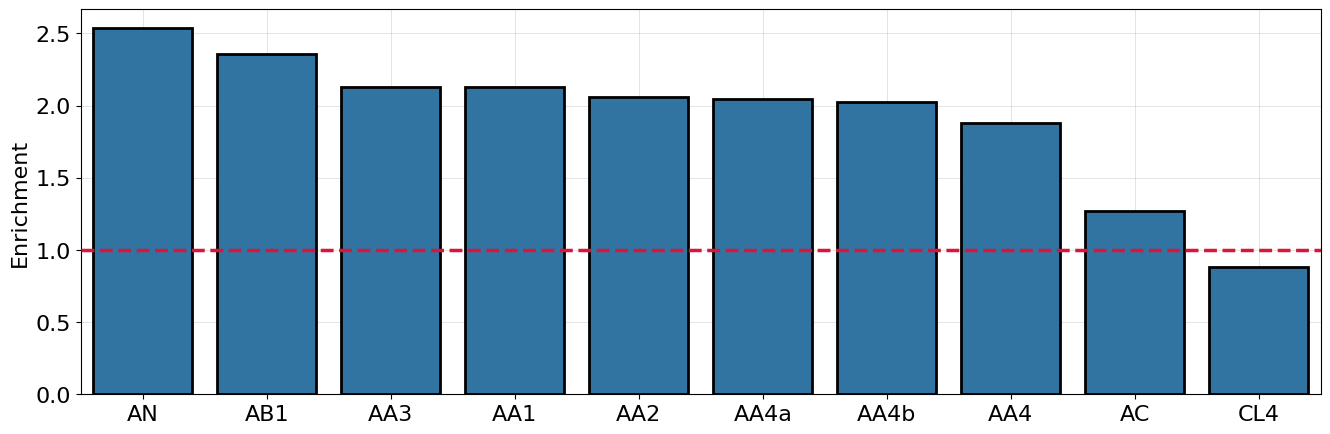

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
sns.barplot(
    data=maximum_250bp, 
    x=maximum_250bp.index, 
    # hue='allele', 
    y='Enrichment', 
    ax=ax,
    zorder=3,
    edgecolor='black',
    lw=2.0,
    palette=colors_df
)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xlabel('')
ax.tick_params(axis="both", labelsize=16, zorder=0)
ax.set_ylabel('Enrichment')
ax.axhline(1.0, linestyle='--', lw=2.5, zorder=3, color="crimson")
ax.yaxis.label.set_size(16)
fig.savefig(f"{figures}/maximum_within_250bp.png", bbox_inches='tight')

## Enrichment in Bins

In [56]:
bins_200bp = {}
for allele in alleles:
    density = allele_densities[allele]
    mean = np.mean(density)
    bins = np.zeros(29)
    # for j, i in enumerate(range(250, 6000, 500)):
    for j, i in enumerate(range(300, 6000, 200), 0):
        temp = density[i:i+200].sum()
        # print(j)
        bins[j] = temp
        if j > 27:
            break
    bins = bins / np.mean(bins)
    bins_200bp[allele] = pd.Series(bins).to_frame(name='Enrichment').reset_index().assign(index=lambda ds: ds['index']+1)

In [57]:
def make_bins(density):
    bins = np.zeros(28)
    # for j, i in enumerate(range(250, 6000, 500)):
    for j, i in enumerate(range(300, 6000, 200), 0):
        temp = density[i:i+200].mean()
        bins[j] = temp
        if j > 26:
            break
    # bins = bins / np.mean(bins)
    return pd.Series(bins).to_frame(name='Enrichment')
            
bins_200bp = {}
for allele in alleles:
    avg, ci_025, ci_975 = allele_densities_bootstrap[allele]
    
    # avg_mean = np.mean(avg)
    # avg_ci_025 = np.mean(ci_025)
    # avg_ci_975 = np.mean(ci_975)

    # avg = avg / avg_mean
    # ci_025 = ci_025 / avg_ci_025
    # ci_975 = ci_975 / avg_ci_975
    bins_avg = make_bins(avg)
    bins_ci_025 = make_bins(ci_025)
    bins_ci_975 = make_bins(ci_975)
    
    bins_200bp[allele] = bins_avg.merge(bins_ci_025, left_index=True, right_index=True, suffixes=("", "_ci_025"))\
                                 .merge(bins_ci_975, left_index=True, right_index=True, suffixes=("", "_ci_975"))\
                                 .reset_index()\
                                 .assign(index=lambda ds: ds['index']+1)

bins_200bp[allele]

,index,Enrichment,Enrichment_ci_025,Enrichment_ci_975
0,1,0.836730,0.667405,0.989285
1,2,0.755740,0.593996,0.935478
2,3,0.723818,0.571055,0.890750
3,4,0.798902,0.648941,0.958660
4,5,0.811810,0.638083,0.989932
5,6,0.858731,0.691448,1.027323
6,7,0.834736,0.660994,1.017955
7,8,0.907596,0.734926,1.076924
8,9,0.889056,0.712406,1.070344
9,10,0.899485,0.757203,1.039363


0 CL4
1 AC
2 AN
3 AA4b
4 AA4
5 AA2
6 AA4a
7 AA1
8 AB1
9 AA3


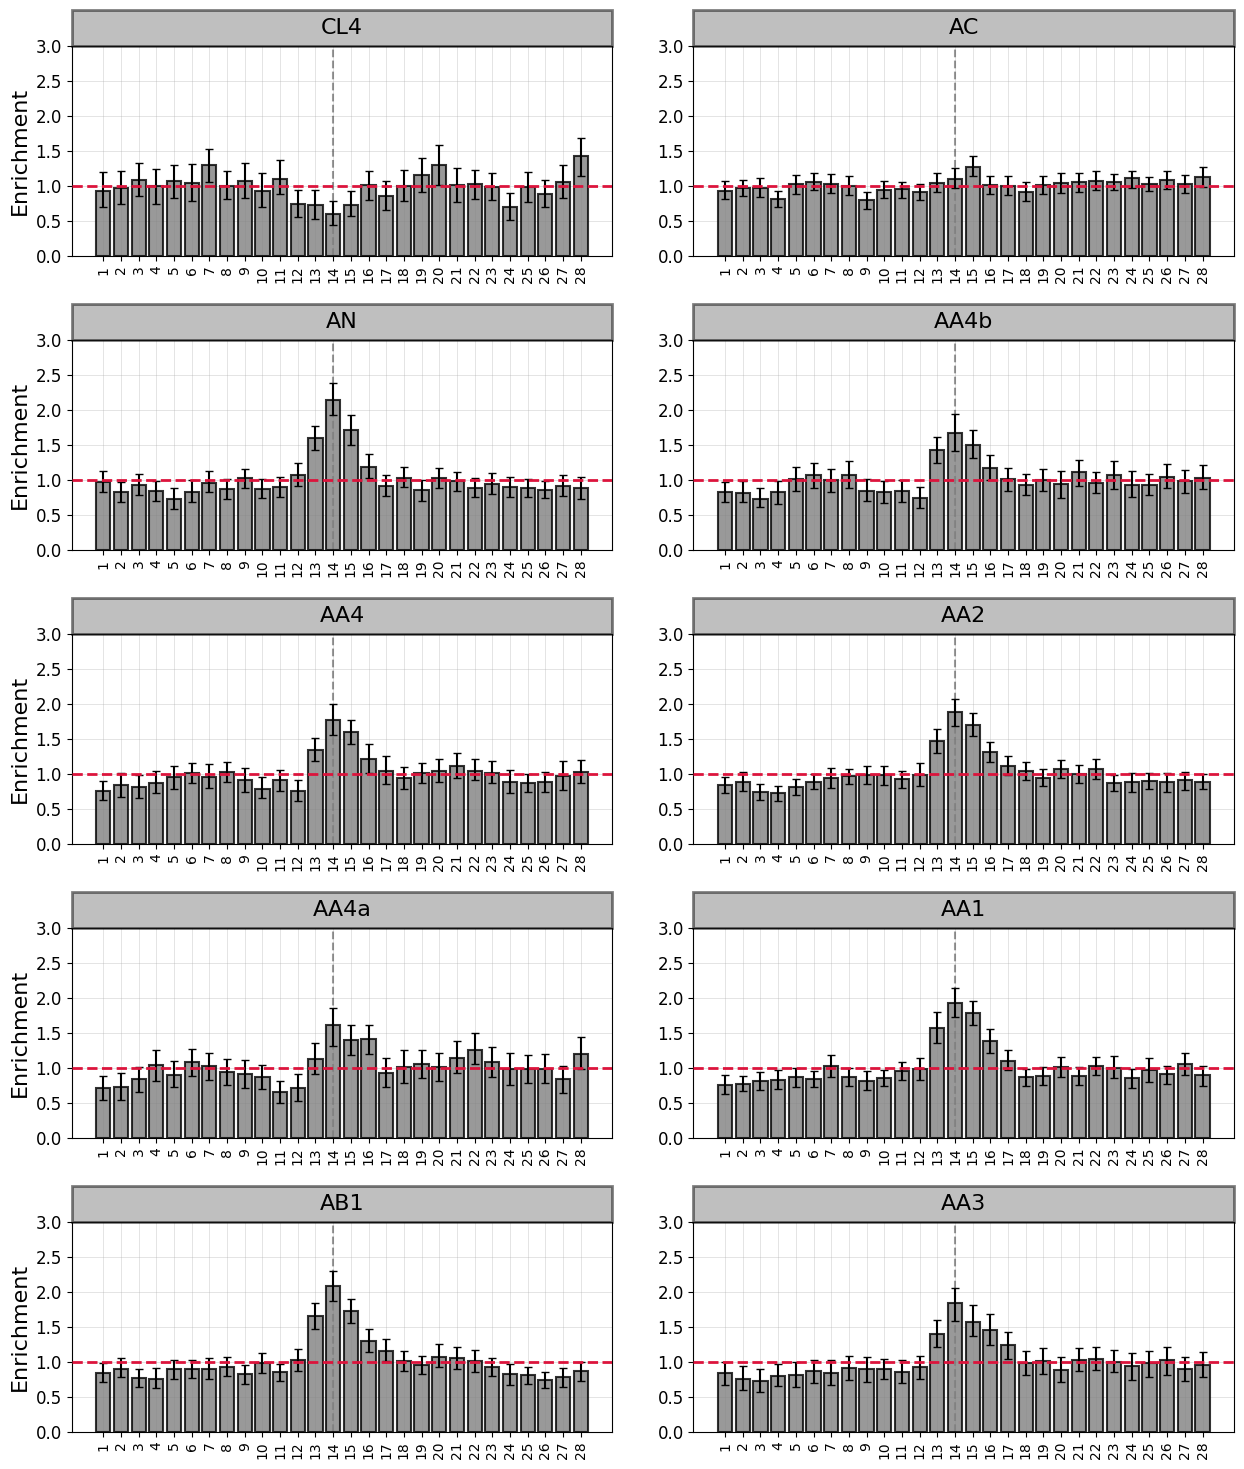

In [58]:
from matplotlib.pyplot import Rectangle
fig, ax_ = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
ax_ = ax_.flatten()
fig.subplots_adjust(wspace=0.15, hspace=0.4)

for i, (allele, density) in enumerate(bins_200bp.items()):
        ax = ax_[i]
        print(i, allele)
        sns.barplot(
                data=density, 
                x="index",
                y="Enrichment",
                color="gray",
                edgecolor='black',
                linewidth=1.5,
                # color='#d4779c',
                alpha=0.8,
                #label=allele,
                zorder=3,
                errorbar=None,
                ax=ax
                )
    
        ax.errorbar(density['index']-1, density['Enrichment'], 
            yerr=[
                  density['Enrichment'] - density['Enrichment_ci_025'], 
                  density['Enrichment_ci_975'] - density['Enrichment']
                 ],
            fmt='none', 
            c='black',
            zorder=4,
            capsize=3.0
        )
        ax.axvline(13.0, lw=1.5, zorder=1, linestyle='--', alpha=0.4, color='black')
        ax.axhline(1.0, lw=2.0, zorder=4, linestyle='--', color='crimson')
        ax.xaxis.label.set_size(14)
        # ax.legend(loc=0, prop={"size": 12})
        if i%2 == 0:
                ax.set_ylabel("Enrichment")
        else:
                ax.set_ylabel('')
        ax.set_xlabel('')
        ax.tick_params(axis="x", rotation=90, labelsize=10, zorder=0)
        ax.yaxis.label.set_size(16)
        ax.grid(lw=0.4, alpha=0.6, zorder=0)
        ax.set_axisbelow(True)
        ax.set_ylim(ymax=3)
        ax.tick_params(axis="y", labelsize=12, zorder=0)
        fig.canvas.draw()
        # Get the bounding box of the second subplot in figure coordinates
        bbox = ax.get_position()
        rect_height = 0.02  # Height of the rectangle relative to figure
        rect_bottom = bbox.y1  # Bottom of the rectangle aligns with the top of the subplot
        rect_left = bbox.x0  # Left aligns with the subplot
        rect_width = bbox.x1 - bbox.x0  # Width matches the subplot

        # Add rectangle
        fig.patches.append(Rectangle((rect_left, rect_bottom), rect_width, rect_height,
                                        edgecolor="black",
                                        linewidth=2.0,
                                        transform=fig.transFigure, 
                                        facecolor='gray', 
                                        alpha=0.5)
                                        )
        
        # Add title text
        fig.text(rect_left + rect_width / 2, rect_bottom + rect_height / 2, 
                allele, 
                ha='center', 
                va='center', 
                color='black', 
                fontsize=16
        )
    
fig.savefig(f"{figures}/HDNA_enrichment_allele_prmd9_bootstrap_28_bins.png", bbox_inches='tight')

In [59]:
for j, i in enumerate(range(300, 6000, 200)):
    temp = density[i:i+200]
    print(j, i, i+200)

0 300 500
1 500 700
2 700 900
3 900 1100
4 1100 1300
5 1300 1500
6 1500 1700
7 1700 1900
8 1900 2100
9 2100 2300
10 2300 2500
11 2500 2700
12 2700 2900
13 2900 3100
14 3100 3300
15 3300 3500
16 3500 3700
17 3700 3900
18 3900 4100
19 4100 4300
20 4300 4500
21 4500 4700
22 4700 4900
23 4900 5100
24 5100 5300
25 5300 5500
26 5500 5700
27 5700 5900
28 5900 6100


## Enrichment 3KB Window

In [61]:
from mindi.coverage.pwm_density import PWMExtractor
extractor = PWMExtractor()

alleles = list(intersect_df['allele'].unique())
seqID = list(intersect_df['seqID'].unique())
allele_densities_bootie = {}

for allele in tqdm(alleles, leave=True):
    intersect_df_query = intersect_df[intersect_df['allele'] == allele]
    # for paper N=1,000 
    avg, ci_025, ci_975 = bootstrap(intersect_df_query, 
                                    N=100, 
                                    window_size=3000)
    allele_densities_bootie[allele] = avg, ci_025, ci_975

100%|██████████| 10/10 [19:30<00:00, 117.01s/it]


In [65]:
avg, ci_025, ci_975 = allele_densities_bootie["CL4"]
ci_025

0       0.837735
1       0.838153
2       0.851585
3       0.850947
4       0.850947
          ...   
5996    0.930788
5997    0.958292
5998    0.903070
5999    0.827508
6000    0.850938
Name: 0.025, Length: 6001, dtype: float64

In [66]:
avg

0       1.139405
1       1.142752
2       1.142507
3       1.144284
4       1.144284
          ...   
5996    1.243456
5997    1.247658
5998    1.202397
5999    1.120917
6000    1.149628
Length: 6001, dtype: float64

In [67]:
figures = Path("HDNA_figures")
figures.mkdir(exist_ok=True)

In [68]:
sns.color_palette("Set3")

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [69]:
!pwd

/storage/group/izg5139/default/nicole/rDNA_HDNA


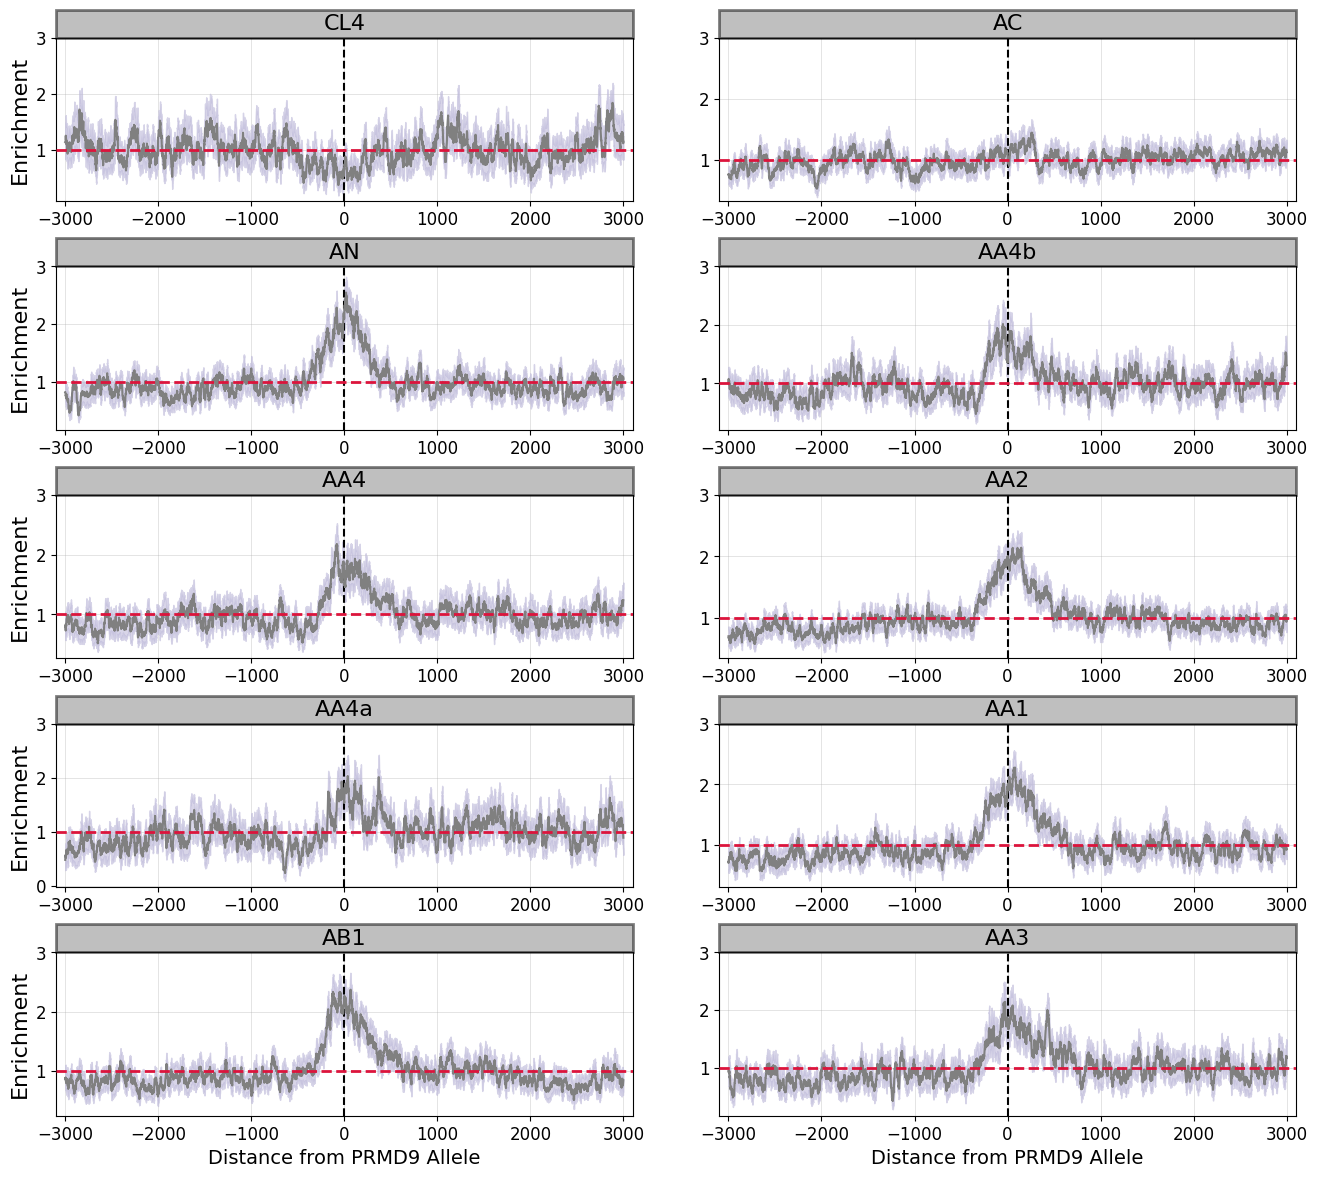

In [71]:
from matplotlib.pyplot import Rectangle

fig, ax_ = plt.subplots(nrows=5, ncols=2, figsize=(16, 14))
ax_ = ax_.flatten()
fig.subplots_adjust(wspace=0.15, hspace=0.4)

for i, (allele, density) in enumerate(allele_densities_bootie.items()):
        ax = ax_[i]
        avg, ci_025, ci_975 = density
        ax.plot(
                range(-window_size, window_size+1),
                avg,
                color='gray',
                # color='#d4779c',
                alpha=1.0,
                #label=allele,
                zorder=3
                )
        ax.fill_between(
                        x=range(-window_size, window_size+1),
                        y1=ci_025,
                        y2=ci_975,
                        color=sns.color_palette("Set3")[2],
                        alpha=0.6,
                        zorder=2
        )
        # ax.set_title(allele)
        ax.axvline(0.0, linestyle='--', color='black')
        ax.title.set_size(12)
        ax.grid(lw=0.4, alpha=0.6, zorder=0)
        if i == 8 or i == 9:
                ax.set_xlabel("Distance from PRMD9 Allele")
        else:
                ax.set_xlabel('')

        ax.axhline(1.0, lw=2.0, zorder=4, linestyle='--', color='crimson')
        ax.xaxis.label.set_size(14)
        # ax.legend(loc=0, prop={"size": 12})
        if i%2 == 0:
                ax.set_ylabel("Enrichment")
        else:
                ax.set_ylabel('')
        ax.yaxis.label.set_size(16)
        ax.set_xlim(xmin=-window_size - 100, xmax=window_size + 100)
        ax.set_ylim(ymax=3.0)
        ax.tick_params(axis="both", labelsize=12, zorder=0)
        fig.canvas.draw()
        # Get the bounding box of the second subplot in figure coordinates
        bbox = ax.get_position()
        rect_height = 0.02  # Height of the rectangle relative to figure
        rect_bottom = bbox.y1  # Bottom of the rectangle aligns with the top of the subplot
        rect_left = bbox.x0  # Left aligns with the subplot
        rect_width = bbox.x1 - bbox.x0  # Width matches the subplot

        # Add rectangle
        fig.patches.append(Rectangle((rect_left, rect_bottom), rect_width, rect_height,
                                        edgecolor="black",
                                        linewidth=2.0,
                                        transform=fig.transFigure, 
                                        facecolor='gray', 
                                        alpha=0.5)
                                        )
        
        # Add title text
        fig.text(rect_left + rect_width / 2, rect_bottom + rect_height / 2, 
                allele, 
                ha='center', 
                va='center', 
                color='black', 
                fontsize=16
        )
    
# fig.savefig(f"{figures}/HDNA_enrichment_allele_prmd9_bootstrap_3kb.png", bbox_inches='tight')

## Polynomial Distance

In [72]:
def calculate_poly(intersect_df, step: int = 20):
        step = step
        intersect_df["bin_dist"] = pd.cut(
                                        np.abs(intersect_df["distance"]), 
                                        range(0, window_size+step, step),
                                        include_lowest=True,
                                        labels=False
                                        )
        # intersect_df["bin_dist"].value_counts()
        grouped = intersect_df.groupby("bin_dist", as_index=False)\
                              .agg(total=("overlap", "count"))
        
        x_data = grouped['bin_dist']
        y_data = grouped['total']
        params, _ = curve_fit(poly3, x_data, y_data)
        b, c, d, e, f = params
        return grouped, x_data, poly3(x_data, b, c, d, e, f), params

In [73]:
def tangent(x, b, c, d, e):
    return 4 * b * x ** 3 + 3 * c * x ** 2 + 2 * d * x + e

0 CL4
1 AC
2 AN
3 AA4b
4 AA4
5 AA2
6 AA4a
7 AA1
8 AB1
9 AA3


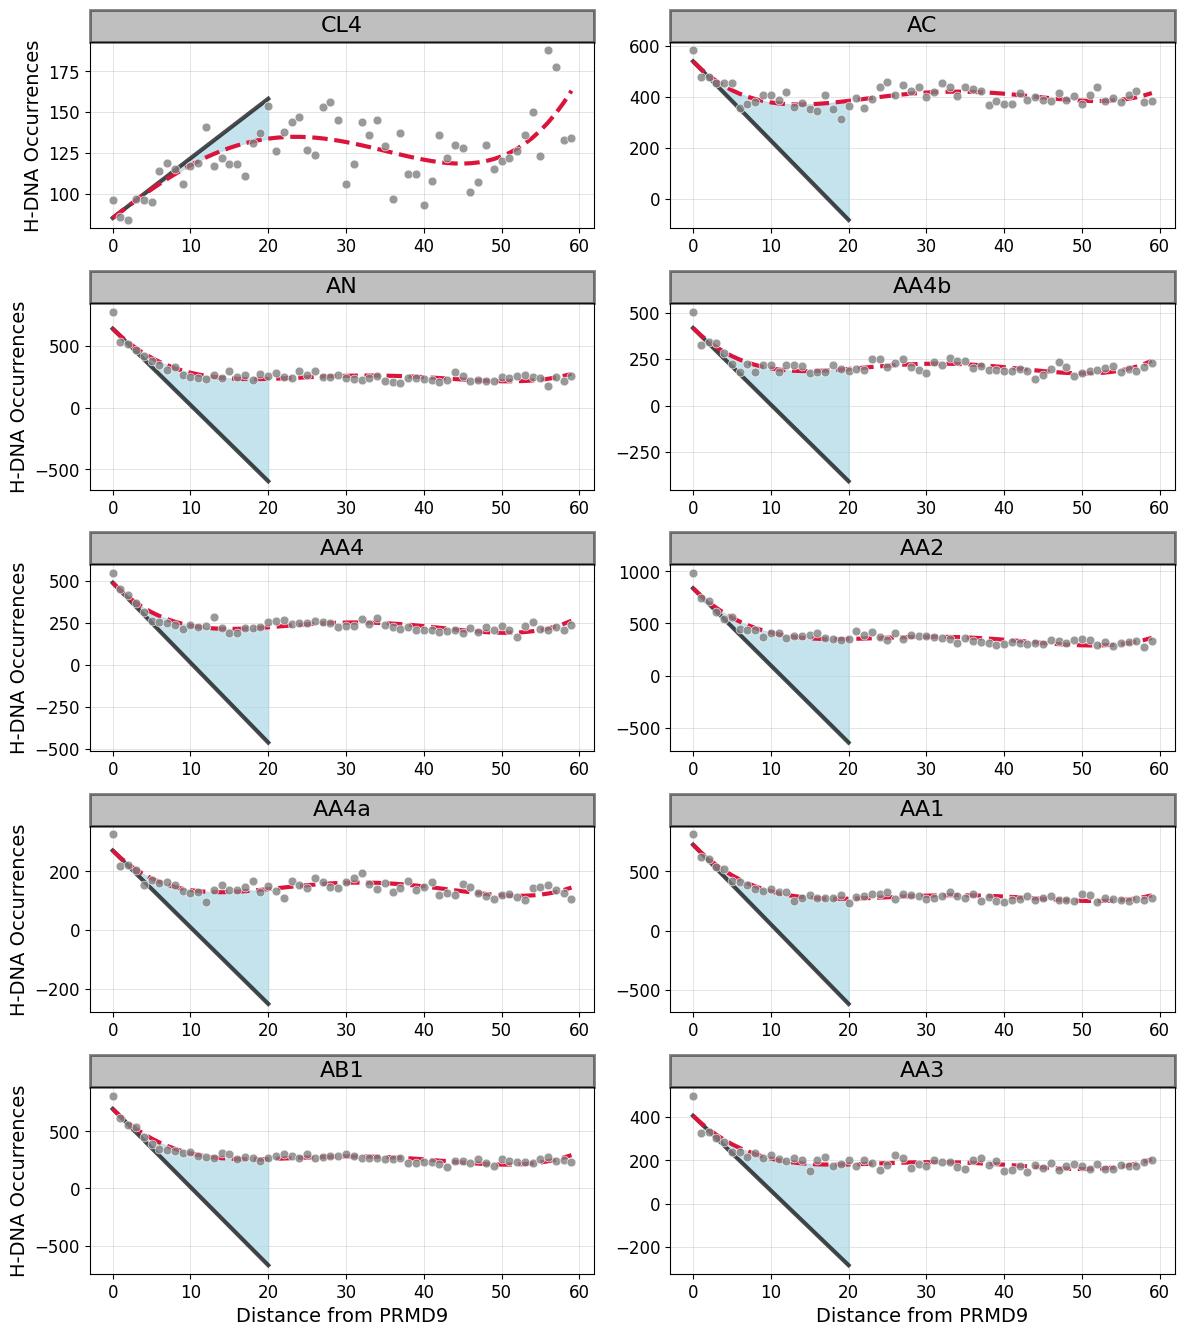

In [74]:
fig, ax_ = plt.subplots(nrows=5, ncols=2, figsize=(14, 16))
ax_ = ax_.flatten()
fig.subplots_adjust(wspace=0.15, hspace=0.4)
step = 50
for i, allele in enumerate(allele_densities.keys()):
    print(i, allele)
    ax = ax_[i]
    grouped, x_data, y_data, params = calculate_poly(intersect_df.query(f"allele == '{allele}'").copy(), step=step)
    b, c, d, e, f = params
    sns.scatterplot(
                    data=grouped, 
                    x="bin_dist", 
                    y="total", 
                    ax=ax, 
                    color='gray', 
                    alpha=0.8,
                    s=40, 
                    zorder=5
                    )
    xrange = np.linspace(0, 20, 200)
    x0 = 0
    poly =  poly3(xrange, b, c, d, e, f)
    tan = [ (i - x0) * tangent(x0, b, c, d, e) + poly3(x0, b, c, d, e, f) for i in xrange]
    ax.plot(xrange, tan, lw=3.0, zorder=4, color='black', alpha=0.7)
    ax.fill_between(xrange, y1=tan, y2=poly, color='lightblue', alpha=0.7, zorder=2)
    ax.plot(x_data, 
            y_data, 
            color='crimson', 
            lw=3.0, 
            linestyle='--',
            zorder=4,
            label="4th Degree Polynomial"
            )
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    ax.set_xlabel("Distance from PRMD9 Allele")
    ax.xaxis.label.set_size(14)
    ax.legend(handles=[], frameon=False)
    # ax.legend(loc=0, prop={"size": 12})
    ax.set_ylabel("H-DNA Occurrences")
    ax.yaxis.label.set_size(14)
    # ax.set_xlim(xmin=-1)
    ax.tick_params(axis="both", labelsize=12, zorder=0)

    if i%2 == 1:
        ax.set_ylabel('')
    if i != 8 and i != 9:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Distance from PRMD9')

    fig.canvas.draw()
    # Get the bounding box of the second subplot in figure coordinates
    bbox = ax.get_position()
    rect_height = 0.02  # Height of the rectangle relative to figure
    rect_bottom = bbox.y1  # Bottom of the rectangle aligns with the top of the subplot
    rect_left = bbox.x0  # Left aligns with the subplot
    rect_width = bbox.x1 - bbox.x0  # Width matches the subplot

    # Add rectangle
    fig.patches.append(Rectangle((rect_left, rect_bottom), rect_width, rect_height,
                                    edgecolor="black",
                                    linewidth=2.0,
                                    transform=fig.transFigure, 
                                    facecolor='gray', 
                                    alpha=0.5))
    
    # Add title text
    fig.text(rect_left + rect_width / 2, rect_bottom + rect_height / 2, 
            allele, 
            ha='center', 
            va='center', 
            color='black', 
            fontsize=16
    )


In [77]:
queries = intersect_df_query[["seqID", "motif_start", "motif_end", "overlap"]].drop_duplicates(subset=['seqID', 'motif_start', 'motif_end']).reset_index(drop=True)
queries_bed = BedTool.from_dataframe(queries).sort()

coverage_df = pd.read_table(
                    compartments_bed.coverage(queries_bed).fn,
                    header=None,
                    names=["seqID", "start", "end", "compartment"] + COVERAGE_FIELDS

).query("coverage > 0")
coverage_df

,seqID,start,end,compartment,totalHits,overlappingBp,compartmentLength,coverage
354,chr1,395193,411933,gene,3,60,16740,0.003584
385,chr1,403151,404978,exon,3,60,1827,0.032841
688,chr1,591273,598935,gene,1,20,7662,0.002610
689,chr1,592232,598935,exon,1,20,6703,0.002984
2079,chr1,1180187,1214901,gene,2,31,34714,0.000893
...,...,...,...,...,...,...,...,...
1830130,chrY,17735099,17735406,Alu,2,23,307,0.074919
1830973,chrY,19778988,19984049,gene,7,140,205061,0.000683
1830988,chrY,19826585,19826873,Alu,1,3,288,0.010417
1831150,chrY,20109756,20110053,Alu,1,5,297,0.016835
